In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
digits = pd.read_csv('./代码/digits.csv')

In [3]:
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
digits.shape

(42000, 785)

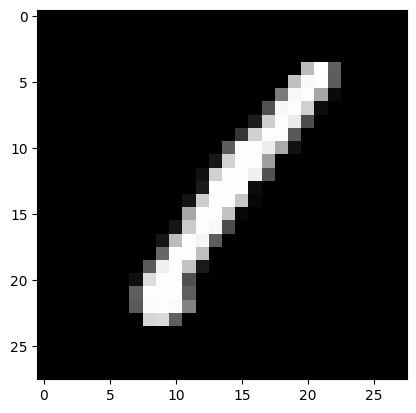

In [5]:
plt.imshow(digits.iloc[0,1:].values.reshape(28,28),cmap='gray')

In [6]:
from sklearn.svm import SVC

In [7]:
data = digits.iloc[:,1:].values.copy()
target = digits.label.values.copy()

In [8]:
svc=SVC()

In [9]:
# 特征太多, 训练时间太长. 
#svc.fit(data, target)

In [10]:
# PCA 是一种降维算法. 
# 原理：1、求特征协方差矩阵；
# 2、求协方差的特征值和特征向量；
# 3、将特征值按照从大到小排序，选择其中最大的K个

In [11]:
# 鸢尾花数据(150, 4) . (4, 2) --> (150, 2)

In [12]:
from sklearn.decomposition import PCA

In [13]:
# n_components 要降维到多少维. 具体降成多少比较好, 也是需要去实验. 
# whiten白化, 降维之后, 数据的分布是一样的. 
pca = PCA(n_components=10,whiten=True)

In [14]:
data_pca=pca.fit_transform(data)

In [15]:
data_pca.shape

(42000, 10)

In [16]:
svc.fit(data_pca,target)

SVC()

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
cross_val_score(SVC(),data_pca,target,cv=5,n_jobs=-1,verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   26.7s remaining:   40.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.7s finished


array([0.93059524, 0.9327381 , 0.92952381, 0.93214286, 0.93309524])

In [19]:
for n in range(10,200,10):
    pca = PCA(n_components=n,whiten=True)
    data_pca=pca.fit_transform(data)
    svc=SVC()
    print(n,cross_val_score(svc,data_pca,target,cv=5,n_jobs=-1).mean())

10 0.9316190476190476
20 0.9712619047619047
30 0.9775238095238095
40 0.9786666666666667
50 0.9787142857142858
60 0.9777857142857143
70 0.9774285714285714
80 0.9772380952380952
90 0.9758333333333333
100 0.9750714285714285
110 0.9739761904761904
120 0.9729047619047619
130 0.9715238095238095
140 0.9707619047619047
150 0.9696190476190475
160 0.9690714285714286
170 0.9676666666666666
180 0.9661190476190477


KeyboardInterrupt: 

In [ ]:
# pca还有一个作用: pca可以用于数据脱敏, 特征经过pca处理之后, 特征会失去原来的物理意义. 